# MNIST Dataset
 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.mnist.load_data()

In [3]:
len(dataset)

2

In [4]:
train , test = dataset

In [5]:
len(train)

2

In [6]:
len(test)

2

In [7]:
x_train , y_train = train

In [8]:
x_test , y_test = test

In [9]:
len(x_train) , len(y_train) , len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

In [10]:
x_train.shape

(60000, 28, 28)

0


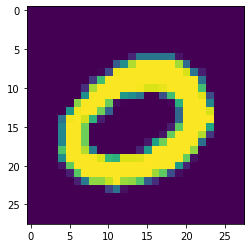

In [11]:
plt.imshow(x_train[6001])
print(y_train[6001])

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

8


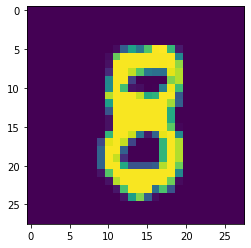

In [15]:
plt.imshow(x_test[6001])
print(y_test[6001])

In [18]:
model  = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam",loss= "sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/sample - loss: 2.4457 - acc: 0.5135
Epoch 2/10
60000/60000 [==============================] - 14s 234us/sample - loss: 1.4653 - acc: 0.5825
Epoch 3/10
60000/60000 [==============================] - 14s 234us/sample - loss: 1.3432 - acc: 0.5992
Epoch 4/10
60000/60000 [==============================] - 14s 234us/sample - loss: 1.3056 - acc: 0.6103
Epoch 5/10
60000/60000 [==============================] - 14s 234us/sample - loss: 1.3137 - acc: 0.6039
Epoch 6/10
60000/60000 [==============================] - 14s 234us/sample - loss: 1.2731 - acc: 0.6048
Epoch 7/10
60000/60000 [==============================] - 14s 233us/sample - loss: 1.2606 - acc: 0.6146
Epoch 8/10
60000/60000 [==============================] - 14s 234us/sample

In [23]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train_scaled_flattened = x_train_scaled.reshape(len(x_train),28*28)
x_test_scaled_flattened = x_test_scaled.reshape(len(x_test),28*28)

In [24]:
model  = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam",loss= "sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train_scaled_flattened,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.4924 - acc: 0.8759
Epoch 2/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.3060 - acc: 0.9152
Epoch 3/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2861 - acc: 0.9209
Epoch 4/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2752 - acc: 0.9238
Epoch 5/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2681 - acc: 0.9257
Epoch 6/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2625 - acc: 0.9271
Epoch 7/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2590 - acc: 0.9288
Epoch 8/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2559 - acc: 0.9305
Epoch 9/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2531 - acc: 0.9309
Epoch 10/10
60000/60000 [================

In [25]:
model.evaluate(x_test_scaled_flattened,y_test)

10000/10000 [==============================] - 1s 126us/sample - loss: 0.2618 - acc: 0.9277


[0.26179305340349673, 0.9277]

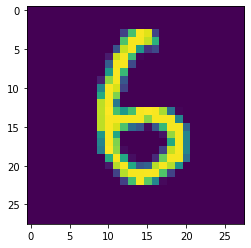

In [30]:
plt.imshow(x_test[21])

In [31]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred[21]

array([9.2928312e-06, 1.8943512e-08, 3.0434769e-04, 1.8183462e-05,
       3.5990856e-06, 1.9362860e-03, 2.0579219e-01, 7.0145528e-11,
       4.6402120e-04, 1.7702162e-08], dtype=float32)

In [45]:
np.argmax(y_pred[21])

6

In [46]:
y_pred_labels = [np.argmax(i)for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_labels)
cm

array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,   10,  925,   14,    5,    4,   14,    9,   41,    4],
       [   3,    0,   18,  918,    0,   20,    3,   12,   29,    7],
       [   1,    1,    2,    2,  902,    0,   16,    4,   10,   44],
       [  10,    2,    1,   32,    9,  770,   16,    7,   38,    7],
       [  11,    3,    5,    1,    7,    9,  917,    1,    4,    0],
       [   1,    6,   25,    4,    6,    1,    0,  945,    4,   36],
       [   7,    6,    5,   14,    7,   17,   11,    7,  890,   10],
       [   9,    6,    1,    9,   17,    5,    0,   16,    9,  937]],
      dtype=int64)

Text(69.0, 0.5, 'truth')

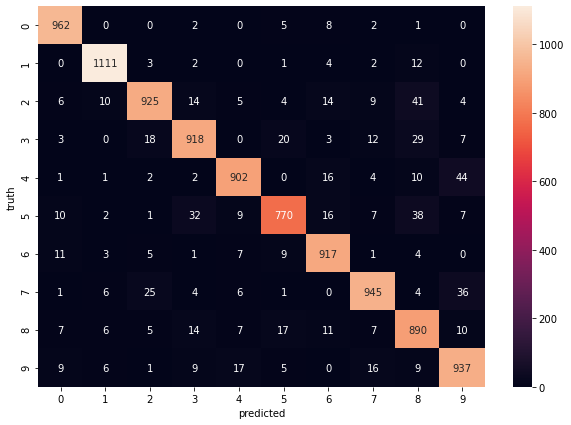

In [55]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [56]:
model  = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")])
model.compile(optimizer="adam",loss= "sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train_scaled_flattened,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.2946 - acc: 0.9177
Epoch 2/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.1392 - acc: 0.9593
Epoch 3/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0988 - acc: 0.9710
Epoch 4/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0769 - acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0619 - acc: 0.9816
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0502 - acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0428 - acc: 0.9872
Epoch 8/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0357 - acc: 0.9890
Epoch 9/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0303 - acc: 0.9906
Epoch 10/10
60000/60000 [================

In [57]:
model.evaluate(x_test_scaled_flattened,y_test)

10000/10000 [==============================] - 1s 132us/sample - loss: 0.0801 - acc: 0.9777


[0.08010469762835419, 0.9777]

Text(69.0, 0.5, 'truth')

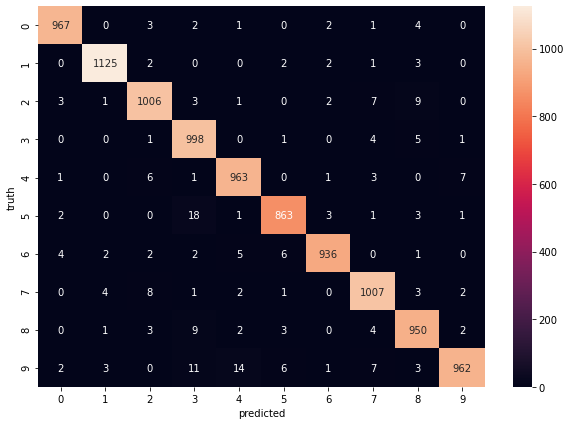

In [58]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred_labels = [np.argmax(i)for i in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")